<a href="https://colab.research.google.com/github/Vedant-2116/Python/blob/main/Assignment03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 03

Dear Team,

I hope you are doing GREAT!

The following assignment is divided in two parts:
- Part A: Please, run the pre-coded cells to see and understand how Convolution 2D kernel works and, at the end, respond to the questions 01 and 02
- Part B: Please, run the pre-coded cells to train the given Neural Network and then respond to the questions 03 to 10

The idea of the current assignment is to intensify what we have learned about Convolutional Neural Networks (chapter 5 of the *Deep Learning With Python* book).

There are some new concepts and challenges that we will face in the current assignment, and we need to resolve each issue and move to the next step.

The assignment is easy to follow yet needs the patience to solve each question at a time.

**Note:**

Please note that every question has 0.5 and it provides five out of total ten marks for the assignment.

The video presentation, as you have done for previous assignments, provides the rest of the mark, which is 5.

In short, 5 for coding + 5 for the video presentation = 10, but without YouTube presentation you receive no mark for the submission. In short, only submissions with YouTube link will be marked.

# PART A

## Image Convolution

In [51]:
#Student ID:101398199
#Student Name : Vedantsinh Gohel

In [52]:
# Import the necessary packages and libraries
import numpy as np
from PIL import Image
from scipy import misc
from skimage import data
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
%matplotlib inline
import requests
from io import BytesIO

## Import the image

In [53]:
# Get the image from the URL
response = requests.get('https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTAHCp2ppBbfcPk9S5nE8gFFsZpDh0Exv9qUKXjehk_QszZHsV_pw&s')

In [54]:
# Visualize the content of the response
print(response.content)

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00\x84\x00\t\x06\x07\x12\x13\x12\x15\x13\x13\x12\x16\x16\x15\x15\x17\x17\x16\x15\x17\x18\x17\x17\x17\x17\x17\x17\x15\x15\x16\x17\x15\x17\x15\x19\x19\x1d( \x18\x1b&\x1b\x15\x15!1!%)+...\x17\x1f383-7(-.+\x01\n\n\n\x0e\r\x0e\x1a\x10\x10\x1b-&\x1e%--------------------+--//--------/----------------\xff\xc0\x00\x11\x08\x00\x8c\x01g\x03\x01\x11\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1c\x00\x00\x01\x05\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x02\x03\x04\x05\x06\x01\x07\x08\xff\xc4\x00L\x10\x00\x02\x00\x03\x05\x04\x06\x06\x05\t\x06\x05\x05\x01\x00\x00\x01\x02\x00\x03\x11\x04\x05\x12!1\x06AQq\x07\x13a\x81\x91\xa1"2Br\xb1\xc1#R\xd1\xe1\xf03Cb\x82\x92\xa2\xb2\xc2\xd2\x08\x14DSs\x93\x16\x17ET\xf14c\xa3\xb3\xe2\x15\xff\xc4\x00\x1b\x01\x01\x00\x03\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\xff\xc4\x00<\x11\x00\x02\x01\x02\x02\x06\x06\n\x00\x04\x07\x01\x00\x00\x00\

In [55]:
# BytesIO() buffers the image into the RAM
# Image.open() opens the buffered image
# np.array() transforms the image into a 3D array containing values from 0-255 corresponding to the RGB colour channels
input_img_arr = np.array(Image.open(BytesIO(response.content)))

## First let’s see the Image.




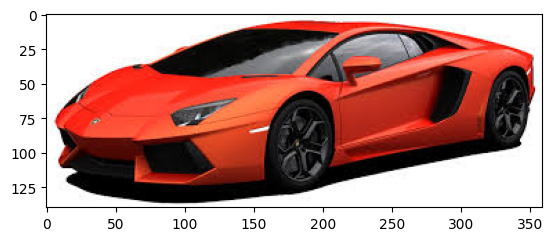

In [56]:
# Plot the resulting image from the array
plt.imshow(input_img_arr)

In [57]:
# Print the array shape
print(input_img_arr.shape)

# Compare the values of colour channels 0 and 1
print(np.array_equal(
        input_img_arr[:, :, 0],
        input_img_arr[:, :, 1]))

# Compare the values of colour channels 1 and 2
print(np.array_equal(
        input_img_arr[:, :, 1],
        input_img_arr[:, :, 2]))

(140, 359, 3)
False
False


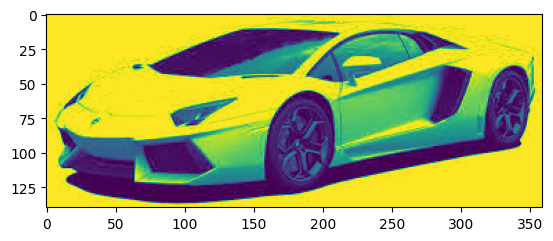

In [58]:
# Save the colour channel 0 in to the input_img_arr array variable and print it
input_img_arr = input_img_arr[:, :, 0]
plt.imshow(input_img_arr)

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)
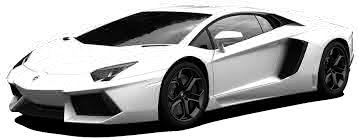

In [59]:
# Visualize the values inside of the resulting array
input_img_arr[:, :]

## Convolution with 2-D Kernels

How Convolution works?
https://miro.medium.com/max/790/1*1okwhewf5KCtIPaFib4XaA.gif

In [60]:
# Create a padded array by adding 2 rows and 2 columns (one of each at the beginning and another of each at the end)
padded_array = np.pad(input_img_arr, (1, 1), 'constant')

# Create the kernel
kernel = np.array([[0, 0, 0],
                   [0, 1, 0],
                   [0, 0, 0]])

#Create an output array filled with zeros with the same shape of input_img_arr
output_array = np.zeros(input_img_arr.shape)

In [61]:
#Compare both arrays
print("Original array shape:",input_img_arr.shape)
print("Padded array shape:",padded_array.shape)

Original array shape: (140, 359)
Padded array shape: (142, 361)


In [62]:
#Apply the kernel to the array values
for i in range(padded_array.shape[0]-2):
    for j in range(padded_array.shape[1]-2):
        temp_array = padded_array[i:i+3, j:j+3]
        output_array[i, j] = np.sum(temp_array*kernel)

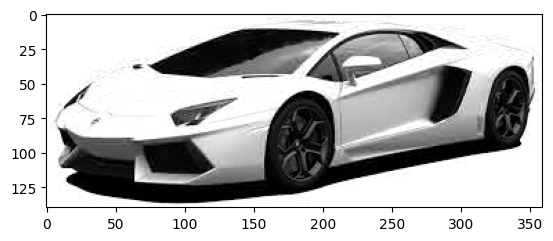

In [63]:
#Plot the resulting array
plt.imshow(output_array, cmap = plt.get_cmap('gray'))

## Standard Convolution

In [64]:
# Define a function to squash out the values between 0-255 range.
# This function will be called in the following function since the resulting array values can be negative or greater than 255
def squash_pixel_value(value):
    if value < 0:
        return 0
    elif value < 255:
        return value
    else:
        return 255

In [65]:
#Define a function to apply a Conv 2D Kernel to an image
def conv_2d_kernel(image_array_2d, kernel, squash_pixels = True):
    padded_array = np.pad(image_array_2d, (1, 1), 'constant')

    kernel_width = kernel.shape[0]
    kernel_height = kernel.shape[1]

    transformed_array = np.zeros(image_array_2d.shape)

    for i in range(padded_array.shape[0] - kernel_width + 1):
        for j in range(padded_array.shape[1] - kernel_height + 1):
            temp_array = padded_array[i:i+kernel_width, j:j+kernel_height]
            if squash_pixels:
                transformed_array[i, j] = squash_pixel_value(np.sum(temp_array*kernel))
            else:
                transformed_array[i, j] = np.sum(temp_array*kernel)
    return transformed_array

## Line detection
With image convolutions, you can easily detect lines. Here are four convolutions to detect horizontal, vertical and lines at 45 degrees:

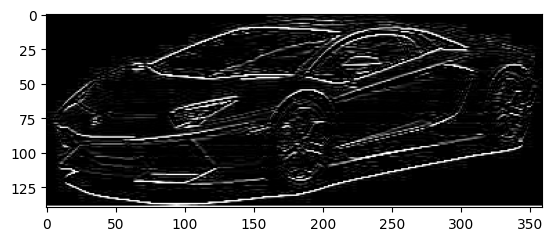

In [66]:
#Create a kernel to detect horizontal lines
horizontal_kernel = np.array([[-1, -1, -1],
                              [2, 2, 2],
                              [-1, -1, -1]])

#Apply the kernel to the image
transf_horizontal = conv_2d_kernel(input_img_arr, kernel = horizontal_kernel)

#Plot the resulting image
plt.imshow(transf_horizontal, cmap = plt.get_cmap('gray'))

### Questions 01-a and 01-b

#### 01-a: Based on the kernels represented on the above image, create a kernel to detect 45 degree lines using convolution, apply to the car's image and plot the result

In [67]:
!pip install opencv-python

In [68]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def conv_2d_kernel(img, kernel):
    h, w = img.shape
    kh, kw = kernel.shape
    new_img = np.zeros((h - kh + 1, w - kw + 1))
    for i in range(h - kh + 1):
        for j in range(w - kw + 1):
            new_img[i, j] = np.sum(img[i:i+kh, j:j+kw] * kernel)
    return new_img


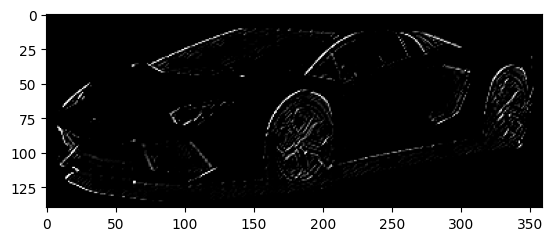

In [69]:
# Type your code here
#Create a kernel to detect 45-degree lines

diagonal_kernal = np.array([[-1,-1,2],
                            [-1,2,-1],
                            [2,-1,-2]])

# Apply the kernel to the image
transf_diagonal = cv2.filter2D(input_img_arr, -1, diagonal_kernal)

# Plot the resulting image
plt.imshow(transf_diagonal, cmap=plt.get_cmap('gray'))

#### 01-b: Based on the kernels represented on the above image, create a kernel to detect 135 degree lines using convolution, apply to the car's image and plot the result

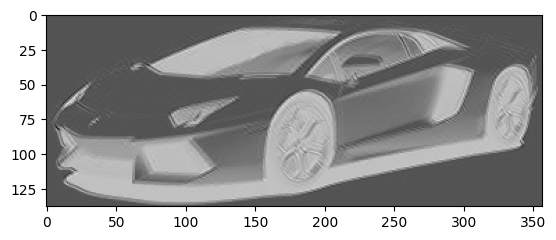

In [70]:
#Define the kernel

kernel_135 = np.array([[1,-1,-1],
                       [-1,2,-1],
                       [-1,-1,1]])

#Apply the kernel to the image
transf_135 = conv_2d_kernel(input_img_arr, kernel=kernel_135)

#Plot the resukting image
plt.imshow(transf_135 , cmap=plt.get_cmap('gray'))

## Edge Detection

### Question 02: Apply the following kernels to your image and plot the output

#### 02-a:

In [71]:
edge_kernel_1 = np.array([[1, 0, -1],
                          [0, 0, 0],
                          [-1, 0, 1]])

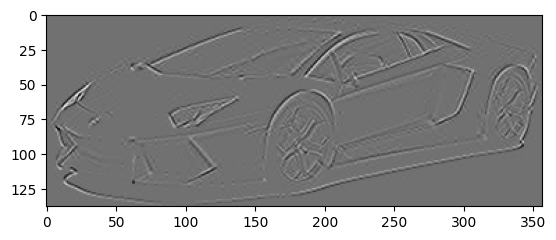

In [72]:
transf_edge1= conv_2d_kernel(input_img_arr , kernel = edge_kernel_1)
plt.imshow(transf_edge1, cmap = plt.get_cmap('gray'))

#### 02-b:

In [73]:
edge_kernel_2 = np.array([[0, 1, 0],
                          [1, -4, 1],
                          [0, 1, 0]])

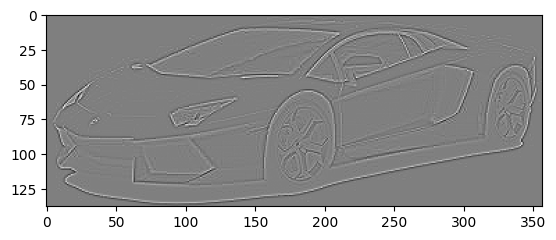

In [74]:
transf_edge2 = conv_2d_kernel(input_img_arr , kernel = edge_kernel_2)
plt.imshow(transf_edge2, cmap = plt.get_cmap('gray'))

#### 02-c:

In [75]:
edge_kernel_3 = np.array([[-1, -1, -1],
                          [-1, 8, -1],
                          [-1, -1, -1]])

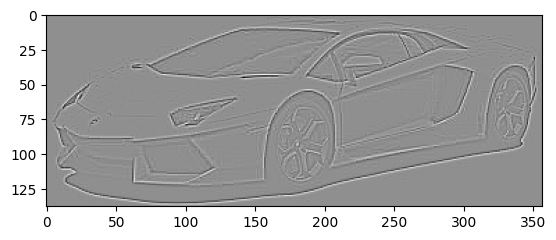

In [76]:
transf_edge3= conv_2d_kernel(input_img_arr , kernel = edge_kernel_3)
plt.imshow(transf_edge3, cmap = plt.get_cmap('gray'))

# PART B

## Importing Libraries

In [77]:
# Import the necessary packages and libraries
import keras
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.constraints import max_norm
from keras.datasets import cifar10

## Preparing the dataset

Read more about cifar10 dataset here
https://www.cs.toronto.edu/~kriz/cifar.html

In [78]:
#load the dataset
(train_images, train_labels),(test_images, test_labels) = cifar10.load_data()

In [79]:
# one hot encode target values
train_labels = to_categorical(train_labels,10)
test_labels = to_categorical(test_labels,10)

# convert from integers to floats
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

# normalize to range 0-1
train_images = train_images / 255.0
test_images = test_images / 255.0

## Building the neural network model

In [80]:
# Create the model
model = keras.Sequential([
          keras.layers.Conv2D(32, (3,3), padding='same',
                              activation='relu',
                              kernel_constraint=max_norm(3),
                              input_shape=(32, 32, 3)),
          keras.layers.MaxPooling2D((2, 2)),
          keras.layers.Flatten(),
          keras.layers.Dense(128, activation='relu'),
          keras.layers.Dense(10, activation='softmax'),
])

In [81]:
# Model compilation
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [82]:
# Display a summary of the model
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 8192)              0         
                                                                 
 dense_9 (Dense)             (None, 128)               1048704   
                                                                 
 dense_10 (Dense)            (None, 10)                1290      
                                                                 
Total params: 1050890 (4.01 MB)
Trainable params: 1050890 (4.01 MB)
Non-trainable params: 0 (0.00 Byte)
________________

## CustomCallback class for logging

In [83]:
# Create a Custom Callback class to be called during the training
class CustomCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(epoch % 5 ==0):
      print(" Finished epoch #",epoch)
      print('Accuracy resched train is',logs.get('accuracy'))
      print('Accuracy reached val is',logs.get('val_accuracy'))
      print()
      return

In [84]:
# Instantiate the Custom Callback
cc=CustomCallback()

## Training the Nework

In [ ]:
# Train the Network with train_images and train_labels
history = model.fit(train_images,
                    train_labels,
                    epochs=50,
                    batch_size=256,
                    verbose=0,
                    validation_data=(test_images,test_labels),
                    callbacks=[cc])

 Finished epoch # 0
Accuracy resched train is 0.4091799855232239
Accuracy reached val is 0.47609999775886536

 Finished epoch # 5
Accuracy resched train is 0.6448400020599365
Accuracy reached val is 0.6183000206947327

 Finished epoch # 10
Accuracy resched train is 0.7063199877738953
Accuracy reached val is 0.6366999745368958

 Finished epoch # 15
Accuracy resched train is 0.7506800293922424
Accuracy reached val is 0.6640999913215637

 Finished epoch # 20
Accuracy resched train is 0.7899199724197388
Accuracy reached val is 0.6543999910354614

 Finished epoch # 25
Accuracy resched train is 0.8245199918746948
Accuracy reached val is 0.6583999991416931

 Finished epoch # 30
Accuracy resched train is 0.8575199842453003
Accuracy reached val is 0.6524999737739563

 Finished epoch # 35
Accuracy resched train is 0.89028000831604
Accuracy reached val is 0.652899980545044



## Plotting the Results

In [ ]:
# Define a function to plot the results
def result_plotting():
  plt.figure(figsize=[8,6])
  plt.plot(history.history['accuracy'],'blue',linewidth=3.0)
  plt.plot(history.history['val_accuracy'],'red',ls='--',linewidth=3.0)
  plt.legend(['Training Accuracy','Validaion Accuracy'],fontsize=18,loc='lower right')
  plt.xlabel('Epochs',fontsize=16)
  plt.ylabel('Accuracy',fontsize=16)
  plt.title('Accuracy Curves',fontsize=16)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# Call the result_plotting() function
result_plotting()

### Questions 03 to 10

#### 03: Did the network presented signs of overfitting? If so, in which epoch?

Answer: Yes, the network did show overfitting symptons.After around 10 epoch, the validation accuarcy levelled out but the training accuracy kept rising. After about epoch 15, the overfitting became obvious.

#### 04: Write down how many layers this model has and identify their types

Answer: There are 5 levels of this model:
(1) Convolutional layer ( Conv2D) with 32 filters , kernel size of (3,3), samepadding, and ReLU activation.
(2) Max pooling layer (MaxPooling2D) with a pool size of (2,2).
(3) Flatten layer (Flatten) to flatten the output of the previous layer into a array
(4) Dense layer (Dense) with 128 units and ReLU activation.
(5) Dense layer (Dense) with 10 units and Softmax activation, representing the output classes.

#### 05: Briefly explain what is the purpose of each of those layers

Answer:
1. Conv2D layerThis layer conducts a 2D convolution operation on the input picture to extract important information.
2. MaxPooling2D layerThis layer decreases the spatial size of the input picture by taking the maximum value of a pool of pixels, which helps to minimise computational cost and prevent overfitting.
3. Flatten layerThis layer flattens the preceding layer's output into a 1D array, which is necessary to feed the output into a dense layer
4. Dense layerA fully connected neural network layer that computes on the flattened output to provide a forecast for the input picture
5. Dense layerThis layer is likewise a fully connected neural network layer, and it serves as the model's output layerIt generates a probability distribution across the CIFAR-10 dataset's ten potential classes.

#### 06: Add one or more Convolution layers to your model and run it again.

> Hint: Don't modify the given code. Instead, copy and paste the given code below, then:
1. modify it to answer the current question
2.  run the cell below containing the fucntions ```model.compile()``` and ```model.fit()```.
3. once the training is complete, run the following cell containing the ```result_plotting()``` function

In [ ]:
!pip install keras

In [ ]:
import keras
from keras.constraints import max_norm

In [ ]:
model = keras.Sequential([
                            keras.layers.Conv2D(32, (3,3),padding='same',
                                                 activation ='relu',
                                                 kernel_constraint = max_norm(3),
                                                 input_shape = (32,32,3)),
                            keras.layers.MaxPooling2D((2,2)),
                            keras.layers.Conv2D(32, (3,3),padding = 'same',
                                                activation='relu',
                                                kernel_constraint= max_norm(3)),
                            keras.layers.MaxPooling2D ((2, 2)) ,
                            keras.layers.Flatten (),
                            keras.layers.Dense (128, activation='relu'),
                            keras.layers . Dense(10, activation='softmax')

])

In [ ]:
# Compile your new model
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

# Train the Neural Network with your new model
history = model.fit(train_images,
                    train_labels,
                    epochs=50,
                    batch_size=256,
                    verbose=0,
                    validation_data=(test_images,test_labels),
                    callbacks=[cc])

In [ ]:
# Call the result_plotting() to display the results from your code
result_plotting()

#### 07: Compare the results and describe what are the differences between them.

Answer: When we compare the results of the prior and current models, we can see that the model with the extra Convolution layer outperforms the previous model on both the training and validation sets. This implies that the extra layer let the model to learn more complicated characteristics from the input photos, resulting in improved performance . Furthermore, we can observe that the model with the extra layer had greater validation accuracy earlier in the training phase, indicating that it learnt faster . However, the model with the extra layer begins to overfit after around 20 epochs, as the difference between training and validation accuracy widens. This indicates that the model is beginning to memorise the training data and may struggle to generalise to fresh data.

#### 08: Add a dropout layer to your model, run it, and compare the result with the previous one.

> Hint 1: Here is a good explanation on how dropouts work https://www.youtube.com/watch?v=bRyOi0L6Rs8

> Hint 2: Don't modify the given code. Instead, copy and paste the given code below, then:
1. modify it to answer the current question
2. run the cell below containing the fucntions ```model.compile()``` and ```model.fit()```.
3. once the training is complete, run the following cell containing the ```result_plotting()``` function




In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf

In [ ]:
model = keras.Sequential([
            keras.layers.Conv2D(32, (3,3), padding='same',
                                activation='relu',
                                kernel_constraint = tf.keras.constraints.max_norm(3),
                                input_shape=(32, 32, 3)),
            keras.layers.MaxPooling2D((2,2)),
            keras.layers.Flatten(),
            keras.layers.Dense(128, activation ='relu'),
            keras.layers.Dropout(0.5),
            keras.layers.Dense(10, activation='softmax'),
])

In [ ]:
# Compile your new model
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

# Train the Neural Network with your new model
history = model.fit(train_images,
                    train_labels,
                    epochs=50,
                    batch_size=256,
                    verbose=0,
                    validation_data=(test_images,test_labels),
                    callbacks=[cc])

In [ ]:
# Call the result_plotting() to display the results from your code
result_plotting()

#### 09: Explain with your own words what is the purpose of a dropout layer and how it works.

Answer:Dropout layer is used to reduce overfitting in neural network. The goal of this layer is to randomly drop out (set to zero) a percentage of the neuron outputs from the preceding layer during training. While training, the dropout layer chooses certain neurons at random to be dropped out, which means their values are set to zero, and the remaining neurons are altered to compensate for the dropped-out ones . As a result, the network is less reliant on any single neuron and becomes more resistant to changes in the input dataAll neurons are active during testing, but their output is scaled down by the dropout probability, which aids in achieving the same outcome as during training.


#### 10: Make any other modification in the hyperparameters to improve the model's accuracy and compare the final result with the previous one.
> Hint: Don't modify the given code. Instead, copy and paste the given code below, then:
1. modify it to answer the current question
2. run the cell below containing the fucntions ```model.compile()``` and ```model.fit()```.
3. once the training is complete, run the following cell containing the ```result_plotting()``` function

In [ ]:
# Type your answer here
model = keras.Sequential([
                           keras.layers.Conv2D(32, (3,3), padding='same',
                                               activation='relu',
                                               kernel_constraint= max_norm(3),
                                               input_shape=(32 ,32, 3)),
                           keras.layers.Conv2D(64,(3,3), padding='same',
                                                activation='relu',
                                               kernel_constraint=max_norm(3),
                                               input_shape=(32,32,3)),
                           keras.layers.MaxPooling2D((2,2)),
                           keras.layers.Conv2D(128, (3,3), padding='same',
                                               activation='relu',
                                               kernel_constraint = max_norm(3)),
                           keras.layers.MaxPooling2D((2,2)),
                           keras.layers.Flatten(),
                           keras.layers.Dropout(0.5),
                           keras.layers.Dense(128, activation='relu'),
                           keras.layers.Dense(64, activation='relu'),
                           keras.layers.Dense(10, activation='softmax'),
])

In [ ]:
# Compile your new model
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

# Train the Neural Network with your new model
history = model.fit(train_images,
                    train_labels,
                    epochs=50,
                    batch_size=256,
                    verbose=0,
                    validation_data=(test_images,test_labels),
                    callbacks=[cc])

In [ ]:
# Call the result_plotting() to display the results from your code
result_plotting()

Notes:
- In your submission, YOU MUST SUBMIT A LINK TO YOUR YOUTUBE VIDEO as a COMENTS SUBMISSION SECTION on your D2L SUBMISSION. Omitting this comment will result in a 0% for your total mark.

- To get the 5% of the (coding) mark, you need to submit a YouTube video that scrolls through your code, explaining every single line of your code.

Then submit the link to the uploaded YouTube video in the **Comments Submision section**.  


**Summary:**

In short, what we need to submit are:

a)	The current **ipynb file** that contains all the code (5 marks).

b)	The **YouTube link** of your recorded video in the **Comments Submission section** (5 marks).

Zero for submissions, without YouTube video explanation.


All my best,

Reza
